In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


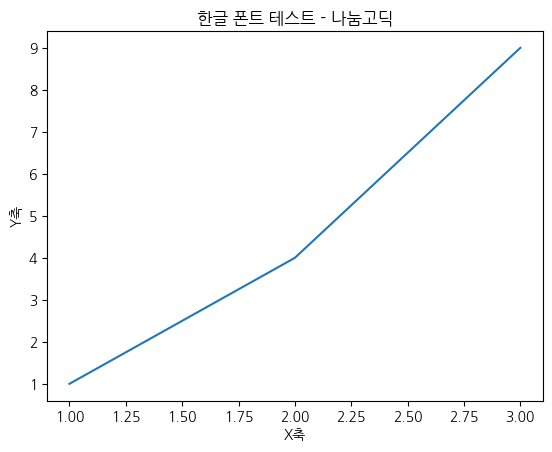

In [2]:
# 폰트 설정# 1) 나눔 글꼴 설치
!apt-get -qq update
!apt-get -qq install fonts-nanum

# 2) matplotlib 폰트 캐시 삭제 (중요)
import shutil, os
shutil.rmtree(os.path.expanduser("~/.cache/matplotlib"), ignore_errors=True)

# 3) 폰트 수동 등록 + 기본 폰트로 지정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=12)
fm.fontManager.addfont(font_path)              # 새 폰트를 매니저에 등록
rcParams["font.family"] = "NanumGothic"        # 기본 폰트로 지정
rcParams["axes.unicode_minus"] = False         # 음수기호 깨짐 방지

# 4) 테스트
plt.plot([1,2,3],[1,4,9])
plt.title("한글 폰트 테스트 - 나눔고딕")
plt.xlabel("X축")
plt.ylabel("Y축")
plt.show()

-생존 여부(survived):0은 '사망', 1은 '생존'으로 값을 변경한다.
-선실(pclass):1은 1등실, 2는 '2등실', 3은 '3등실'로 값을 변경한다.

생존 여부(survived):0은 '사망', 1은 '생존'

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
dict1 = {0:'사망', 1:'생존'}
dict2 = {1:'1등실', 2:'2등실', 3:'3등실'}

df = df.replace({'survived': dict1})
df = df.replace({'pclass': dict2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,사망,3등실,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,생존,1등실,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,생존,3등실,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,생존,1등실,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,사망,3등실,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1. 선실별 인원수 막대그래프

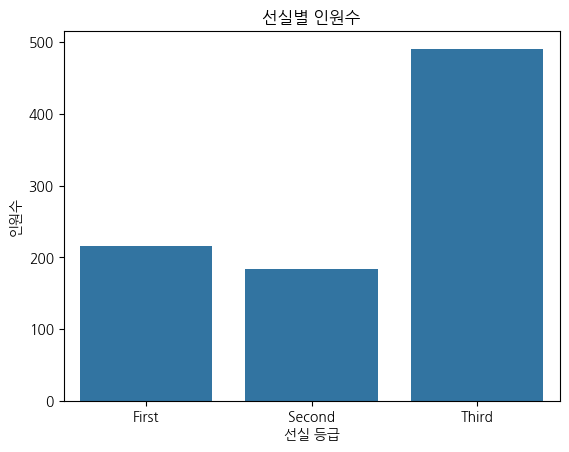

In [6]:
# 선실별 인원수 막대그래프
sns.countplot(data=df, x="class")

plt.title("선실별 인원수")
plt.xlabel("선실 등급")
plt.ylabel("인원수")
plt.show()

2. 선실별 인원수를 막대그래프로 나타내되, 각 막대는 사망 인원과 생존 인원을 구분하여 표시

In [8]:
df2 = df.pivot_table(index = 'pclass', # 행 위치에 들어갈 컬럼
                    columns = 'survived', # 열 위치에 들어갈 컬럼
                    values = 'class', # 데이터로 사용할 컬럼
                    aggfunc = 'count' # 데이터 집계함수
                    )

df2

survived,사망,생존
pclass,,
1등실,80,136
2등실,97,87
3등실,372,119


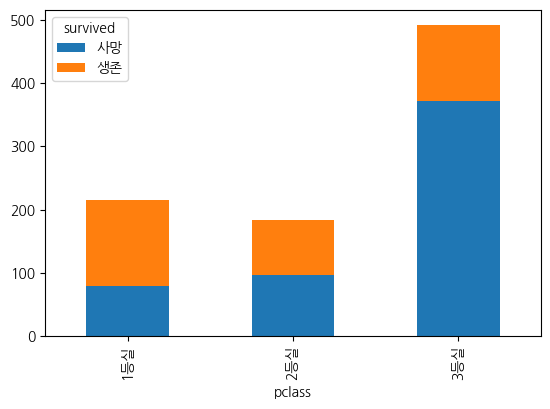

In [9]:
df2.plot.bar(stacked=True)
plt.subplots_adjust(bottom=0.2)
plt.show()

4. 연령별 평균 생존율

In [12]:
# 연령별 평균 생존율 계산

df['survived_numeric'] = df['survived'].replace({'사망': 0, '생존': 1})
age_survival = df.groupby("age")["survived_numeric"].mean().reset_index()
age_survival.head(50)

/tmp/ipython-input-706226909.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['survived_numeric'] = df['survived'].replace({'사망': 0, '생존': 1})


,age,survived_numeric
0,0.42,1.000000
1,0.67,1.000000
2,0.75,1.000000
3,0.83,1.000000
4,0.92,1.000000
5,1.00,0.714286
6,2.00,0.300000
7,3.00,0.833333
8,4.00,0.700000
9,5.00,1.000000


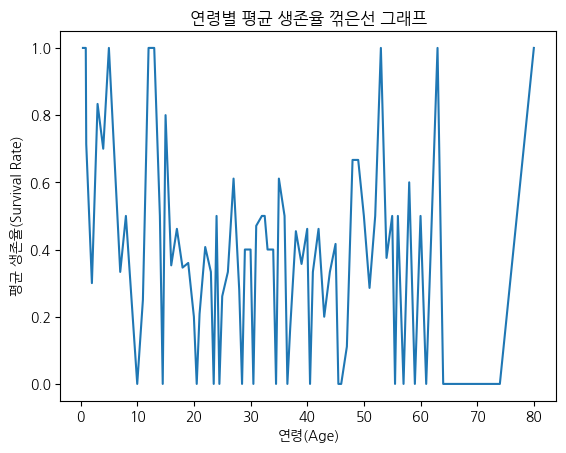

In [13]:
# 꺾은선 그래프
sns.lineplot(data=age_survival, x="age", y="survived_numeric")

plt.title("연령별 평균 생존율 꺾은선 그래프")
plt.xlabel("연령(Age)")
plt.ylabel("평균 생존율(Survival Rate)")
plt.show()

5. 생존 여부 비율을 파이 그래프로

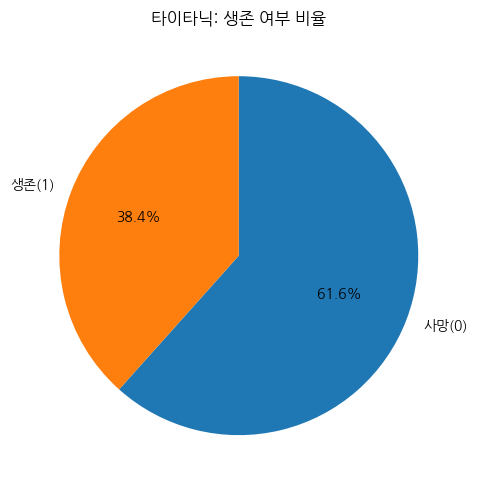

In [14]:
sv_counts = df["survived"].value_counts().sort_index()
labels = ["사망(0)", "생존(1)"]

plt.figure(figsize=(5,5))
plt.pie(
    sv_counts,
    labels=labels,
    autopct="%.1f%%",
    startangle=90,
    counterclock=False
)
plt.title("타이타닉: 생존 여부 비율")
plt.tight_layout()
plt.show()

6. 성별에 따른 생존과 사망 비율

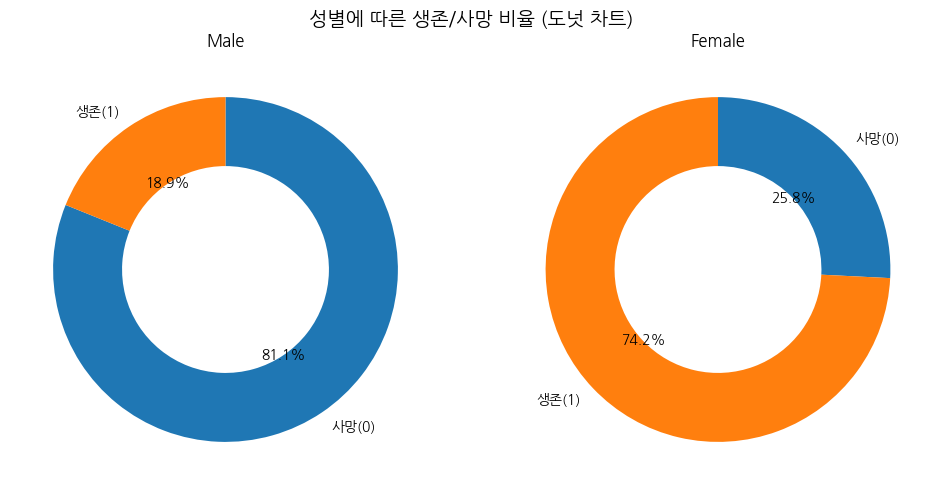

In [15]:
# 성별 리스트
sexes = ["male", "female"]

# 도넛 차트 그리기
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, sex in zip(axes, sexes):
    # 해당 성별 데이터
    subset = df[df["sex"] == sex]
    counts = subset["survived"].value_counts().sort_index()  # 0=사망, 1=생존

    # 도넛 파이
    wedges, texts, autotexts = ax.pie(
        counts,
        labels=["사망(0)", "생존(1)"],
        autopct="%.1f%%",
        startangle=90,
        counterclock=False,
        wedgeprops=dict(width=0.4)  # 도넛 모양
    )
    ax.set_title(f"{sex.capitalize()}")

plt.suptitle("성별에 따른 생존/사망 비율 (도넛 차트)", fontsize=14)
plt.tight_layout()
plt.show()


7. 선실별 생존 인원을 모자이크 플롯으로 나타내되, x축에는 선실(pclass)을, y축에는 생존여부 (survived)를 표시하시오.

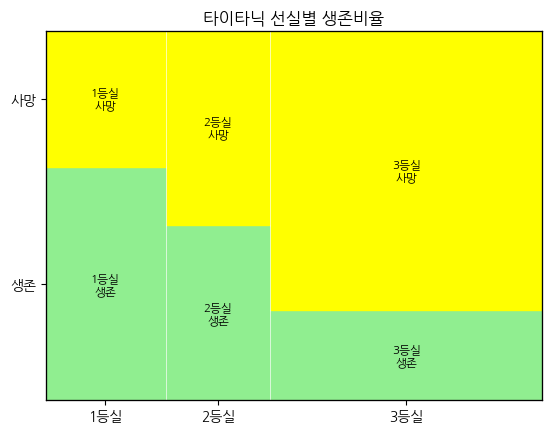

In [17]:
props = lambda key: {'color': 'lightgreen' if '생존' in key else 'yellow'}

# 그래프 작성
mosaic(data = df.sort_values('pclass'),
index = ['pclass', 'survived'],
properties = props, # 타일 색상 변경
axes_label = True, # 축 레이블 표시
title='타이타닉 선실별 생존비율' # 그래프 제목
)

plt.show()


In [18]:
    !pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 2.8 MB/s eta 0:00:00


In [22]:
import plotly.express as px
import matplotlib.image as mpimg

df3 = df.groupby(['pclass', 'survived'])['sex'].count()
df3 = df3.reset_index()
df3.columns = ['pclass', 'survived', 'population']
df3.head()

,pclass,survived,population
0,1등실,사망,80
1,1등실,생존,136
2,2등실,사망,97
3,2등실,생존,87
4,3등실,사망,372


8. 선실별 생존 인원을 트리맵으로

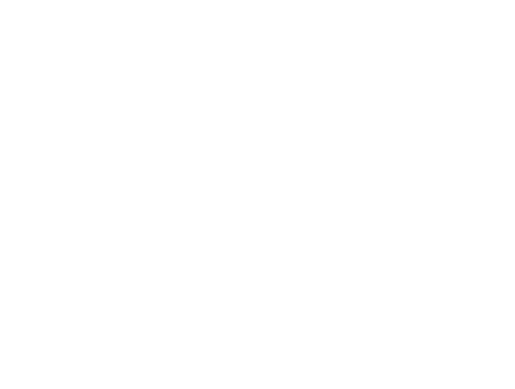

In [21]:
fig = px.treemap(data_frame = df3,
path=['pclass', 'survived'], # 데이터의 계층 구조
values='population', # 타일 면적 기준 컬럼
color='population', # 색 온도 기준 컬럼
color_continuous_scale='Bluyl' # 컬러 팔레트
)

plt.axis('off') # 축 눈금 제거
fig.update_layout(title_text = 'Titinic', # 그래프 제목
title_font_size =20) # 제목 폰트 크기

# 그래프 저장 & 화면에 표시하기
fig.write_html('titanic.html')  # html 파일로 결과 저장